In [1]:
import pandas as pd

In [2]:
## 데이터 불러오기
sample = pd.read_csv('basic_table.csv')

In [3]:
sample[sample['genre'] == '\n\t\t\t\t\t\t\t무적핑크 / 이리']

,name,writer,summary,genre,link2
82,삼국지톡,휴재,"""유비, 조조, 손권 등 영웅들이 활약하던 후한, 그 난세에 핸드폰이 있었다면?메신...",\n\t\t\t\t\t\t\t무적핑크 / 이리,https://shared-comic.pstatic.net/thumb/webtoon...
272,삼국지톡,휴재,"""유비, 조조, 손권 등 영웅들이 활약하던 후한, 그 난세에 핸드폰이 있었다면?메신...",\n\t\t\t\t\t\t\t무적핑크 / 이리,https://shared-comic.pstatic.net/thumb/webtoon...


In [4]:
sample[sample['genre'] == '15세 이용가']

,name,writer,summary,genre,link2
298,닥터 프로스트 시즌 3~4,이종범,세상으로부터의 무력감. 엄습하는 두려움. 또다시 덧씌운 분노.끝없는 혐오의 고리로 ...,15세 이용가,https://shared-comic.pstatic.net/thumb/webtoon...


In [5]:
# 예외 처리
sample.drop(sample.index[[82, 272, 298]], inplace = True)
sample.reset_index(inplace = True)
sample.drop('index', axis = 1, inplace = True)

In [6]:
# 장르 세부 분리
story_format = []
genre = []
for i in range(len(sample)):
    story_format.append(sample['genre'][i].split(', ')[0])
    genre.append(sample['genre'][i].split(', ')[1])
sample.drop('genre', axis = 1, inplace = True)

sample['format'] = story_format
sample['genre'] = genre


In [7]:
sample = sample[['name', 'writer', 'format', 'genre', 'summary', 'link2']]

In [8]:
sample

,name,writer,format,genre,summary,link2
0,참교육,채용택 / 한가람,스토리,액션,무너진 교권을 지키기 위해 교권보호국 소속 나화진의 참교육이 시작된다!<부활남> 채...,https://shared-comic.pstatic.net/thumb/webtoon...
1,신의 탑,SIU,스토리,판타지,자신의 모든 것이었던 소녀를 쫓아 탑에 들어온 소년그리고 그런 소년을 시험하는 탑,https://shared-comic.pstatic.net/thumb/webtoon...
2,뷰티풀 군바리,설이 / 윤성원,스토리,드라마,'여자도 군대에 간다면?'본격 여자도 군대 가는 만화!,https://shared-comic.pstatic.net/thumb/webtoon...
3,윈드브레이커,조용석,스토리,스포츠,혼자서 자전거를 즐겨타던 모범생 조자현.원치 않게 자전거 크루의 일에 자꾸 휘말리게...,https://shared-comic.pstatic.net/thumb/webtoon...
4,팔이피플,매미 / 희세,스토리,드라마,"<마스크걸>, <위대한 방옥숙> 매미/희세 작가의 신작!SNS에서 육아용품 파는 평...",https://shared-comic.pstatic.net/thumb/webtoon...
...,...,...,...,...,...,...
447,푸른불꽃,닺,스토리,드라마,유년시절 트라우마를 겪은 '문가야'. 새롭게 전학 온 학교에서 완벽한 모범생이자 모...,https://shared-comic.pstatic.net/thumb/webtoon...
448,데이즈,양수,스토리,스릴러,대한민국 최고 재벌가의 첫째 아들이자 집안의 망나니 ‘한지한’은 오늘도거하게 취했다...,https://shared-comic.pstatic.net/thumb/webtoon...
449,샤인 스타,김현,스토리,로맨스,전학생 선유별이 좋아하는 김샤인은 학교에서 유명한 달리기 스타. 잘생긴 얼굴에 뛰어...,https://shared-comic.pstatic.net/thumb/webtoon...
450,호시탐탐,박현정,스토리,로맨스,윗집엔 호랑이? 아랫집엔 곰! 그 녀석이 이사 온 후 이상한 일이 생긴다. 곰과 호...,https://shared-comic.pstatic.net/thumb/webtoon...


https://ebbnflow.tistory.com/153

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from gensim.models import Word2Vec
from konlpy.tag import Okt
import warnings 
warnings.filterwarnings('ignore')
# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/gulim.ttc"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

C:\Users\admin\Anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [10]:
# 줄거리 한글만 추출
sample['summary'] = sample['summary'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")

In [11]:
# 불용어 정의
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다',
            '또', '다', '그', '나', '앞', '두', '수', '건', '구', '과연', '에서', '녀', '내', '민', '후', '신', '않다', '하지만','하',
            '을', '를', '되다', '이다']

In [12]:
### 단어와 x, y값으로 그래프
def plot_2d_graph(vocabs, xs, ys):
    plt.figure(figsize = (15,15))
    plt.scatter(xs, ys, marker = 'o')
    for i, v in enumerate(vocabs):
        plt.annotate(v, xy = (xs[i], ys[i]))

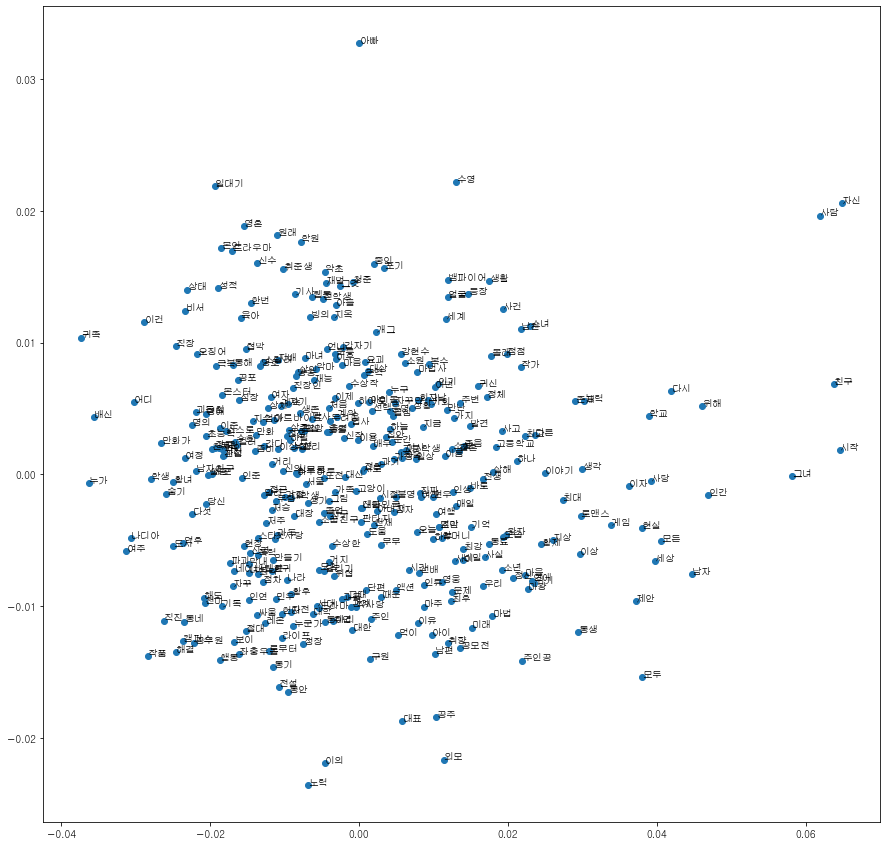

In [13]:
# 형태소 분석기 OKT를 사용한 토큰화 작업 
okt = Okt()
tokenized_data = []
for sentence in sample['summary']:
    temp_X = okt.nouns(sentence) # 토큰화
    temp_X = [noun for noun in temp_X if len(noun) >= 2]
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    tokenized_data.append(temp_X)
    

model = Word2Vec(tokenized_data)    
    # 단어벡터를 구함
word_vectors = model.wv
vocabs = word_vectors.key_to_index
word_vectors_list = [word_vectors[v] for v in vocabs]

from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
xys = pca.fit_transform(word_vectors_list)
xs = xys[:, 0]
ys = xys[:, 1]

plot_2d_graph(vocabs, xs, ys)

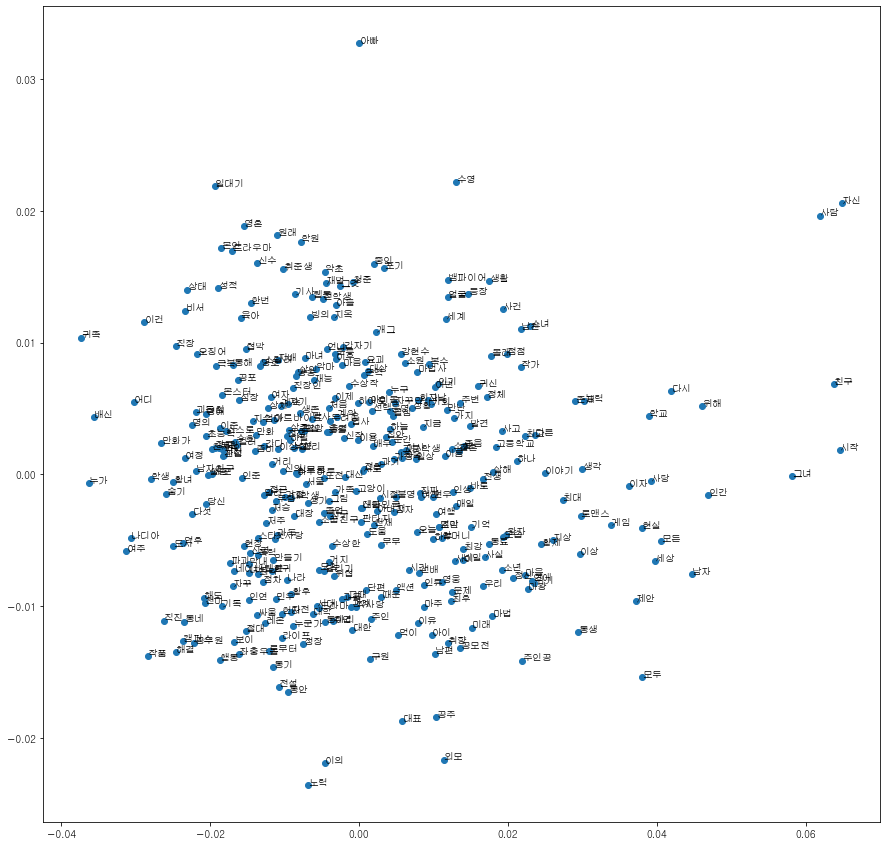

In [14]:
# 형태소 분석기 OKT를 사용한 토큰화 작업 
okt = Okt()
tokenized_data = []
for sentence in sample['summary']:
    temp_X = okt.nouns(sentence) # 토큰화
    temp_X = [noun for noun in temp_X if len(noun) >= 2]
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    tokenized_data.append(temp_X)
    

model = Word2Vec(tokenized_data)    
    # 단어벡터를 구함
word_vectors = model.wv
vocabs = word_vectors.key_to_index
word_vectors_list = [word_vectors[v] for v in vocabs]

from sklearn.decomposition import PCA
pca = PCA(n_components = 5)
xys = pca.fit_transform(word_vectors_list)
xs = xys[:, 0]
ys = xys[:, 1]

plot_2d_graph(vocabs, xs, ys)

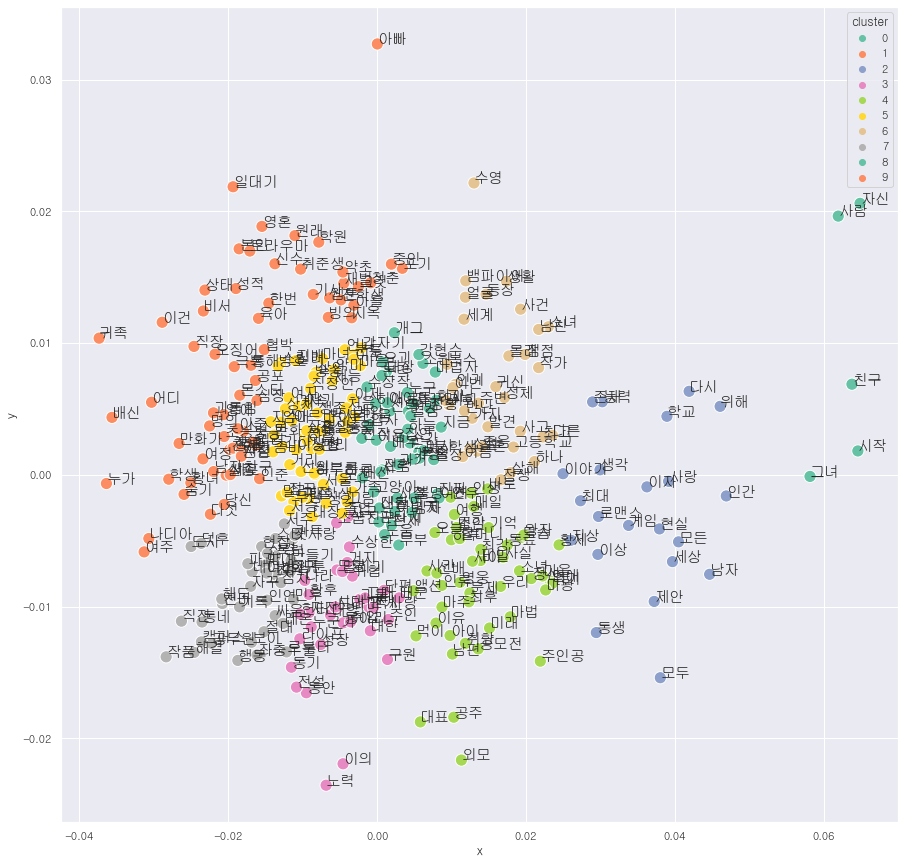

In [18]:
xs_df = pd.DataFrame(xs)
ys_df = pd.DataFrame(ys)
vocabs_df = pd.DataFrame(list(vocabs.keys()))

points = pd.concat([xs_df, ys_df, vocabs_df], axis = 1)
import seaborn as sns
sns.set_palette('Set2')
points.columns = ['x', 'y', 'word']

from sklearn.cluster import KMeans

# k-means clustering 실행
kmeans = KMeans(n_clusters = 10)
kmeans.fit(points[['x', 'y']])

# 결과 확인
result = points[['x', 'y']].copy()
result['cluster'] = kmeans.labels_
result['word'] = points['word']

## 산점도
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/gulim.ttc"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

sns.set(rc = {'figure.figsize' : (15, 15),
             "axes.unicode_minus":False},
        font="gulim",
        style='darkgrid')
sns.scatterplot(x = 'x', y = 'y', hue = 'cluster', data = result, palette = 'Set2',
               s = 150)
for i in range(result.shape[0]):
    plt.text(x = result.x[i], y = result.y[i], s = result.word[i],
            fontdict = dict(size = 15))

### **너무 많아서**

## **핵심단어 추출**

In [19]:
############################  형태소분석
from konlpy.tag import Okt
import re
okt = Okt()
sep = []

for word in sample['summary'] : 
    sep.append(okt.pos(word))

In [20]:
############################# keyword 

keyword = []
blank = []
for word in sep:
    for each in word:
        if each[1] == 'Noun':
            blank.append(each[0])
        else:
            pass
    keyword.append(blank)
    blank = []
    
keyword2 = []                      ### 두글자 이상만 뽑기
blank = []
for word in keyword:
    for each in word:
        if len(each) >= 2 :
            blank.append(each)
    keyword2.append(blank)
    blank = []

sample['keyword'] = keyword2

In [21]:
sample['keyword']

0      [교권, 위해, 교권, 보호국, 소속, 나화, 진의, 교육, 시작, 부활, 채용, ...
1                               [자신, 모든, 소녀, 소년, 소년, 시험]
2                         [여자도, 군대, 간다, 본격, 여자도, 군대, 만화]
3      [혼자, 자전거, 모범생, 현원, 자전거, 크루, 자꾸, 말리, 자유, 청춘, 스트...
4      [마스크, 방옥숙, 매미, 작가, 신작, 육아용품, 유부녀, 박주연, 그녀, 고등학...
                             ...                        
447    [유년, 시절, 트라우마, 가야, 전학, 학교, 모범생, 이자, 모두, 여왕, 차애...
448    [대한민국, 최고, 재벌, 가의, 첫째, 아들, 이자, 집안, 망나니, 오늘, 도거...
449    [전학생, 유별, 샤인, 학교, 달리기, 스타, 얼굴, 운동신경, 지금, 조금, 샤...
450                      [호랑이, 녀석, 이사, 호랑이, 시대, 로맨스, 결말]
451    [천년, 용이, 수험생, 바리, 전설, 과외, 선생, 찬영, 이의, 낙동강, 합격,...
Name: keyword, Length: 452, dtype: object

In [22]:
####################################### TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import defaultdict
from operator import itemgetter

tf_word = []                                          ## 모든 keyword2 이어 붙이기
for i in range(len(sample['keyword'])):
    tf_word.append(' '.join(t for t in sample['keyword'][i]))


tfidf = TfidfVectorizer()
sp_matrix = tfidf.fit_transform(tf_word)

word2id = defaultdict(lambda : 0)
for idx, feature in enumerate(tfidf.get_feature_names()):
    word2id[feature] = idx

word = []
for i, sent in enumerate(tf_word):
    word.append([ [token, sp_matrix[i, word2id[token]]] for token in sent.split()])

for i in range(len(word)):
    word[i].sort(key = itemgetter(1), reverse = True)      # 중요도 순으로 정렬

print('tf-idf 계산 완료')

tf-idf 계산 완료


In [23]:
##########################        한 작품에 여러 단어가 들어가 있으므로 중복 제거
new_word = []
blank = []

for i in range(len(word)):
    
    for j in range(len(word[i])):
        if word[i][j] not in blank :
            blank.append(word[i][j])
        else :
            pass
    new_word.append(blank)  
    blank = []

In [24]:
################################              상위 10개 뽑기
hot_word = []
blank = []
for i in range(len(new_word)):
    for j in range(len(new_word[i])):
        blank.append(new_word[i][j][0])
    hot_word.append(blank[:10])
    blank = []

sample['hot_word'] = hot_word
# sample = sample.drop('keyword', axis = 1)

# =========================연습

In [25]:
oldtext = pd.read_csv('old_review_table.csv')

In [26]:
oldtext

,nick,id,del1,review,time,del2,num_reple,del3,up,del4,down,title,episode
0,좀비,(dlrn****),옵션 열기,생존율1%의 세계에 오신걸 환영합니다,2013-05-10 00:15,답글,11.0,좋아요,15764.0,싫어요,174.0,나이트런,https://shared-comic.pstatic.net/thumb/webtoon...
1,KalMia,(woqj****),옵션 열기,어서와~ 신캐릭사망률 98%를 자랑하는 웹툰은 처음이지?,2013-05-12 19:29,답글,2.0,좋아요,13457.0,싫어요,181.0,나이트런,https://shared-comic.pstatic.net/thumb/webtoon...
2,라인,(qetu****),옵션 열기,웹툰전부를통털어서 이웹툰보다 많이죽는거없을듯,2013-05-18 01:13,답글,2.0,좋아요,9881.0,싫어요,207.0,나이트런,https://shared-comic.pstatic.net/thumb/webtoon...
3,레퀴엠,(lyh3****),옵션 열기,간다 정주행,2013-05-10 18:05,답글,1.0,좋아요,8304.0,싫어요,195.0,나이트런,https://shared-comic.pstatic.net/thumb/webtoon...
4,이지스,(drag****),옵션 열기,제가 직접한번1%의세계를 정주행해보겟습니다.,2013-05-18 20:11,답글,0.0,좋아요,7639.0,싫어요,160.0,나이트런,https://shared-comic.pstatic.net/thumb/webtoon...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
42060,123,(zkdl****),옵션 열기,이름이 진현재면 서랍속 가짜환상이랑 대비되는 남주급 이름이네요 ㅋㅋ,2021-06-01 00:27,답글,1.0,좋아요,1510.0,싫어요,9.0,니나의 마법서랍,https://shared-comic.pstatic.net/thumb/webtoon...
42061,no_nick,(tjtn****),옵션 열기,그 서랍 찾던 여자의 죽었다던 남자친구도 현실 남자친구가 아닐 가능성이 높겠네요. ...,2021-06-01 01:09,답글,0.0,좋아요,1337.0,싫어요,19.0,니나의 마법서랍,https://shared-comic.pstatic.net/thumb/webtoon...
42062,Qkfrksfpahs,(ji_j****),옵션 열기,니나에겐 서랍의 시간이 실제 시간의 반이면 강제로 부른 사람들는 두배처럼 느껴지는거...,2021-06-01 15:10,답글,1.0,좋아요,1234.0,싫어요,28.0,니나의 마법서랍,https://shared-comic.pstatic.net/thumb/webtoon...
42063,JE,(grac****),옵션 열기,헐 모야모야 무슨일이야 ㅠ서랍속에 생기발랄하던 현재 어디갔어 ㅠ,2021-05-31 23:15,답글,1.0,좋아요,1157.0,싫어요,15.0,니나의 마법서랍,https://shared-comic.pstatic.net/thumb/webtoon...


In [27]:
hot_word

[['교권', '작가', '보호국', '나화', '진의', '채용', '기녀', '한가람', '소속', '교육'],
 ['소년', '시험', '소녀', '모든', '자신'],
 ['여자도', '군대', '간다', '본격', '만화'],
 ['자전거', '현원', '크루', '라이딩', '스트릿', '모범생', '혼자', '자유', '자꾸', '말리'],
 ['김예', '박주연', '셀럽', '마스크', '방옥숙', '매미', '육아용품', '유부녀', '팔로워', '부와'],
 ['이오', '광휘', '호위', '시대극', '은둔', '웹소설', '메이드', '고수', '무사', '무협'],
 ['메뉴', '흑역사', '음식', '백수', '시절', '우리', '연애', '그녀'],
 ['백조', '맘씨', '오리가', '갈등', '우정', '보이', '여러', '진짜', '사실', '소녀'],
 ['시간', '상금', '실감', '속편', '팽팽', '사회', '의식', '승자', '긴장감', '최후'],
 ['뱃사공', '노소', '파검법', '진시황', '선근', '후계', '비서', '수행', '전설', '이제'],
 ['변변찮', '학력', '재력', '초능력'],
 ['김기봉', '오류로', '테스트', '귀환', '각성', '던전', '만렙', '가득', '원래', '싸움'],
 ['요리', '호텔', '레스토랑', '인턴', '주방', '한별', '어려움', '수련', '특급', '졸업'],
 ['동생', '복수', '무예', '유망', '연기', '쌍둥이', '기사', '달리', '전혀', '살해'],
 ['탁무', '류민', '침범', '사심', '유일', '절정', '취준생', '아이돌', '가득', '스타'],
 ['소녀', '치사', '희귀', '가슴', '네이버웹툰', '두려움', '자전', '대표', '누구', '복수'],
 ['영웅', '만들기', '공주', '전격', '연극', '대장정', '마치', '나라', '눈물', '소원'

In [28]:
sample.columns

Index(['name', 'writer', 'format', 'genre', 'summary', 'link2', 'keyword',
       'hot_word'],
      dtype='object')

In [42]:
sample['summary'][2]

'여자도 군대에 간다면본격 여자도 군대 가는 만화'

In [46]:
sample['summary'][81]

'끝까지 방심하지 말 것당신의 상상을 뛰어넘는 본격 반전 공포 스릴러가 온다'

In [45]:
from sklearn.metrics.pairwise import cosine_similarity

for i in range(cosine_similarity(sp_matrix[:], sp_matrix[0]).size):
    if cosine_similarity(sp_matrix[:], sp_matrix[2])[i] > 0.05:
        print(i, cosine_similarity(sp_matrix[:], sp_matrix[2])[i])

2 [1.]
81 [0.09420539]
96 [0.07125823]
250 [0.19760523]
300 [0.05524073]
361 [0.0658528]
371 [0.06165153]
390 [0.05803728]
394 [0.05782188]


In [30]:
cosine_similarity(sp_matrix[:], sp_matrix[0:1])

NameError: name 'cosine_similarity' is not defined

# ==========================

# **클러스터링**

# hot_word로 word2vec

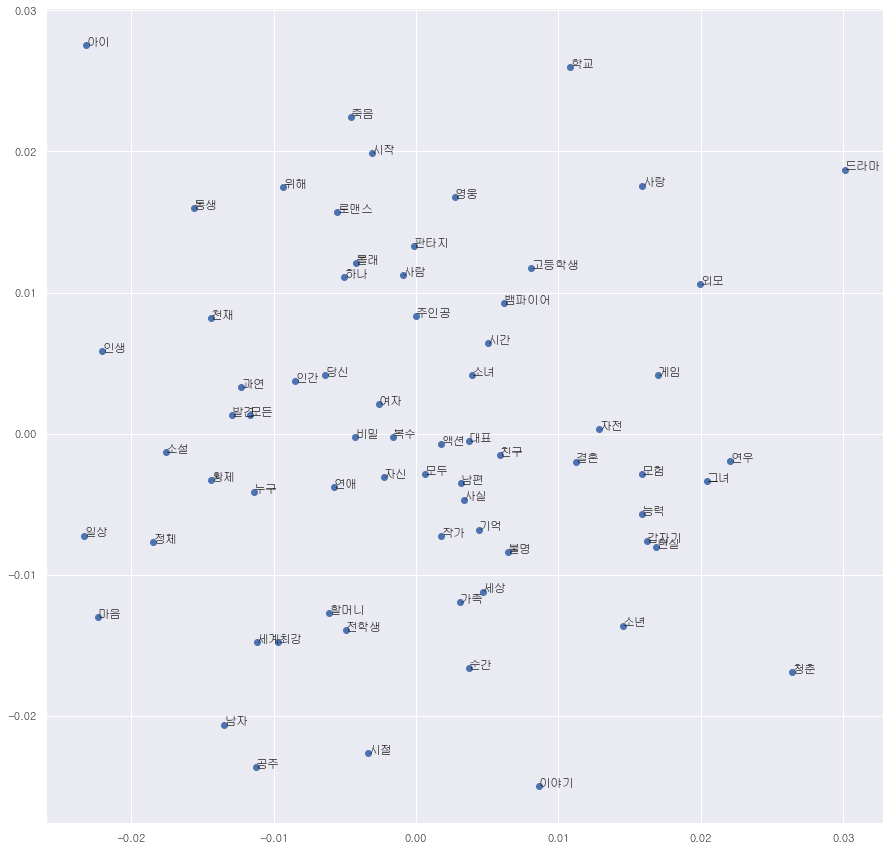

In [137]:
# 형태소 분석기 OKT를 사용한 토큰화 작업 
okt = Okt()
model = Word2Vec(hot_word)    
    # 단어벡터를 구함
word_vectors = model.wv
vocabs = word_vectors.key_to_index
word_vectors_list = [word_vectors[v] for v in vocabs]

from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
xys = pca.fit_transform(word_vectors_list)
xs = xys[:, 0]
ys = xys[:, 1]

plot_2d_graph(vocabs, xs, ys)

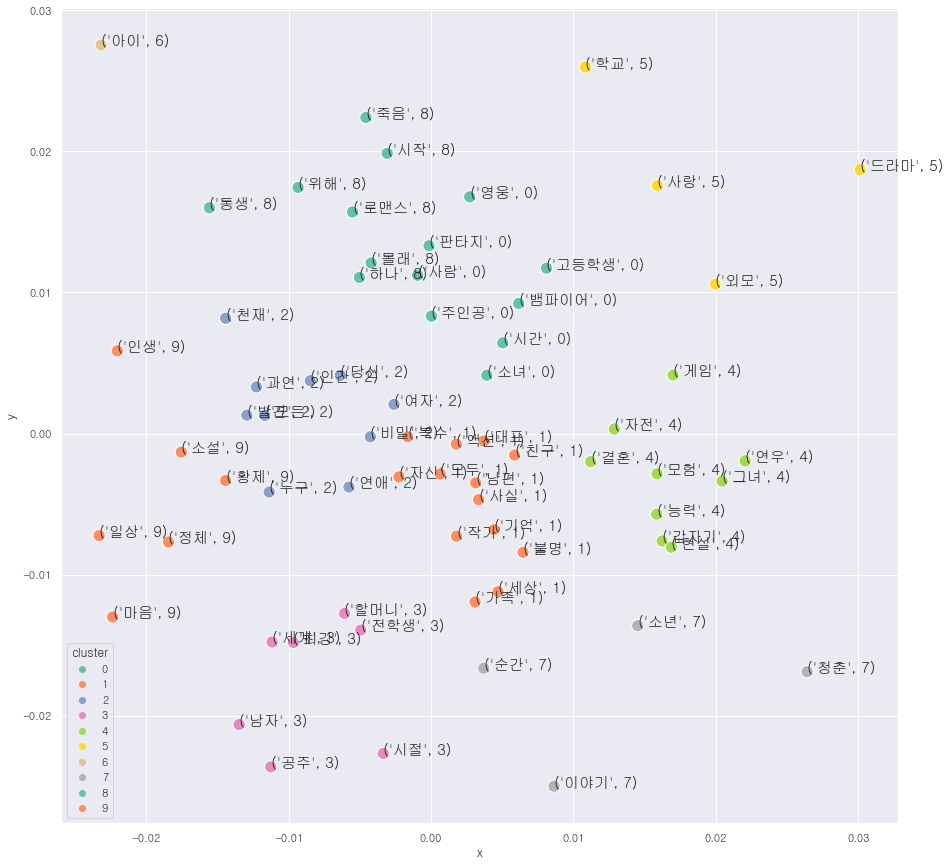

In [66]:
xs_df = pd.DataFrame(xs)
ys_df = pd.DataFrame(ys)
vocabs_df = pd.DataFrame(list(vocabs.keys()))

points = pd.concat([xs_df, ys_df, vocabs_df], axis = 1)
import seaborn as sns
sns.set_palette('Set2')
points.columns = ['x', 'y', 'word']

from sklearn.cluster import KMeans

# k-means clustering 실행
kmeans = KMeans(n_clusters = 10)
kmeans.fit(points[['x', 'y']])

# 결과 확인
result = points[['x', 'y']].copy()
result['cluster'] = kmeans.labels_
result['word'] = points['word']

## 산점도
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/gulim.ttc"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

sns.set(rc = {'figure.figsize' : (15, 15),
             "axes.unicode_minus":False},
        font="gulim",
        style='darkgrid')
sns.scatterplot(x = 'x', y = 'y', hue = 'cluster', data = result, palette = 'Set2',
               s = 150)
for i in range(result.shape[0]):
    plt.text(x = result.x[i], y = result.y[i], s = (result.word[i], result.cluster[i]),
            fontdict = dict(size = 15))

## **T-SNE**  
https://joyhong.tistory.com/133?category=915140

In [126]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
from gensim.models import KeyedVectors

# 그래프에서 마이너스 폰트 깨지는 문제 해결
mpl.rcParams['axes.unicode_minus'] = False

plt.rc('font', family = 'gulim')

def show_tsne():
    tsne = TSNE(n_components = 2)
    X = tsne.fit_transform(word_vectors_list)
    
    df = pd.DataFrame(X, columns = ['x', 'y'])
    fig = plt.figure()
    fig.set_size_inches(30, 20)
    ax = fig.add_subplot(1, 1, 1)
    ax.scatter(df['x'], df['y'])
    
    for word, pos in df.iterrows():
        ax.annotate(word, pos, fontsize = 10)
    
    plt.xlabel('t-SNE 특성 0')
    plt.ylabel('t-SNE 특성 1')

In [127]:
from gensim.test.utils import common_texts
from gensim.models import Word2Vec
model = Word2Vec(sentences = hot_word, vector_size=100, window=5, min_count=1, workers=4)

In [128]:
vocab = list(model.wv.key_to_index)

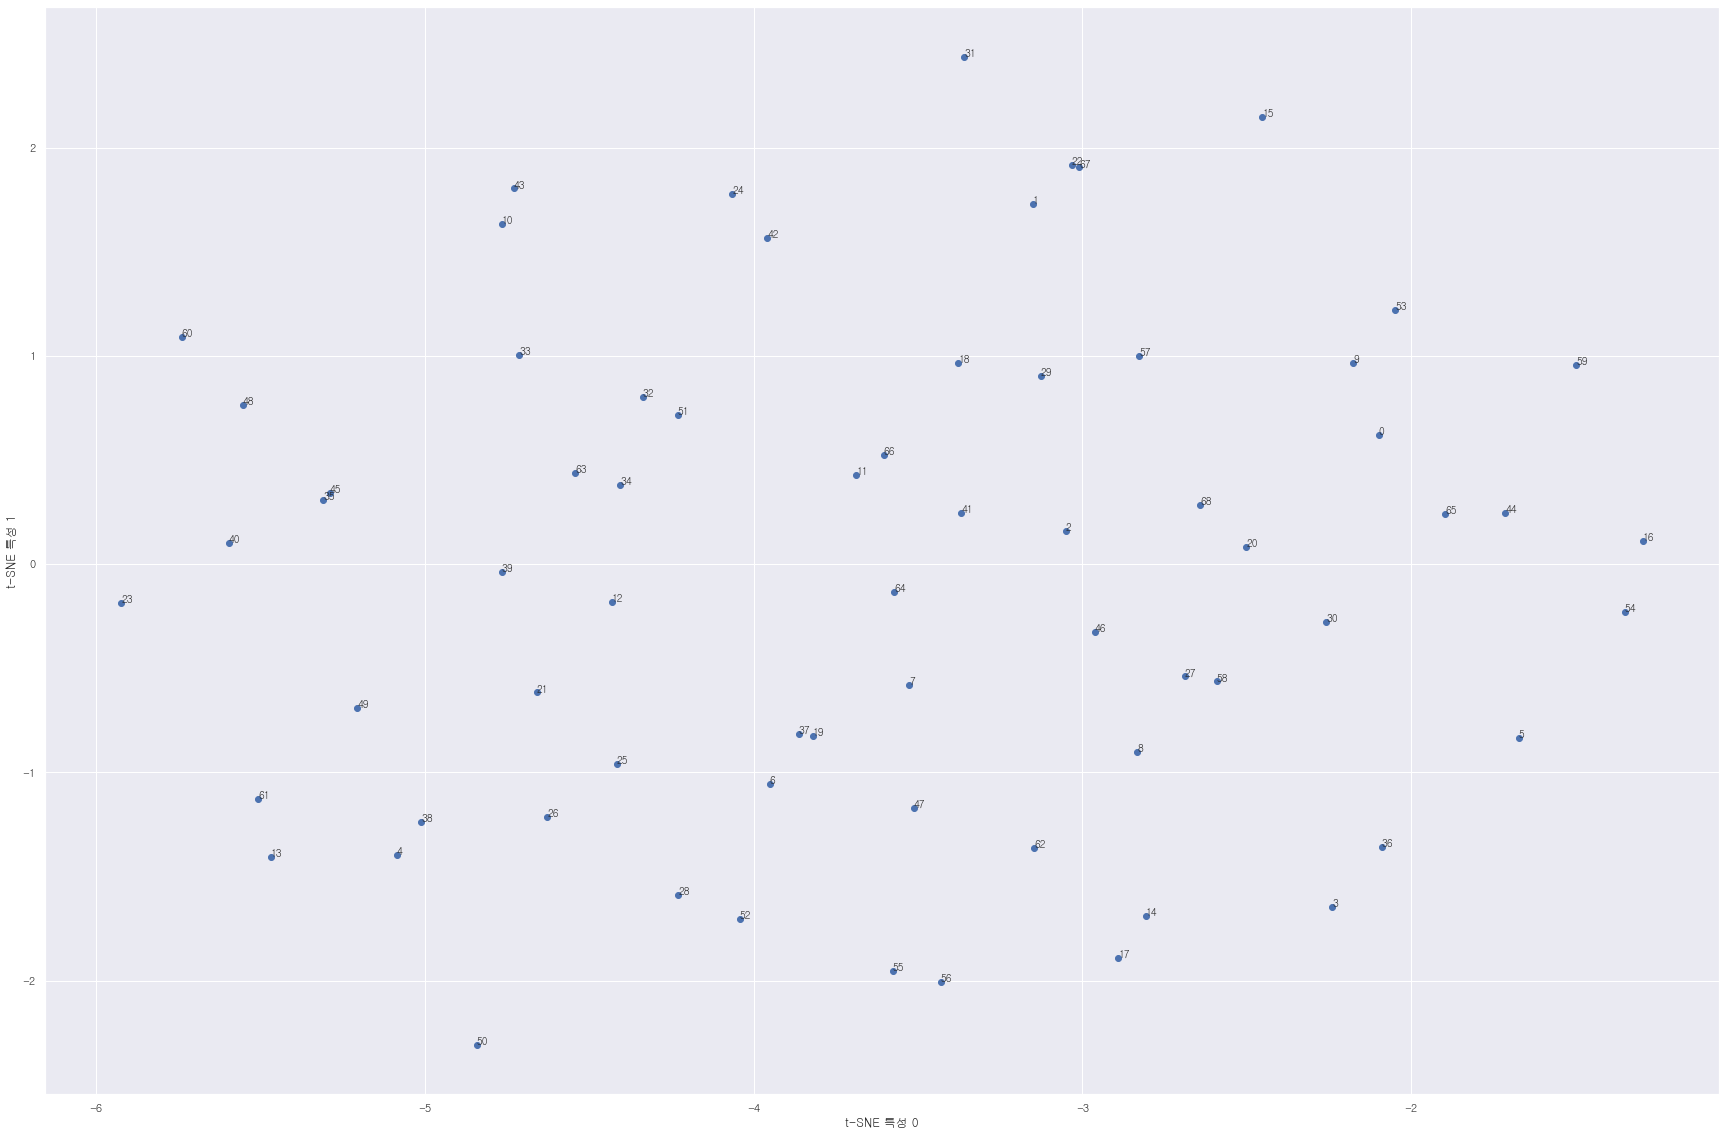

In [129]:
show_tsne()

In [130]:
https://wikidocs.net/22660

SyntaxError: invalid syntax (<ipython-input-130-1d3834cde9ac>, line 1)